In [1]:
# Import all the neccessory libarary
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uci breast cancer datatset.csv')

In [3]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop('id', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Encoding the categorical feature that is our target column.
le = LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Select features into X & y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [8]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [9]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [10]:
#Apply XGB Algorithm
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [11]:
y_pred = xgb_clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [12]:
#Check Accuracy and Confusion Matrix
xgb_acc = xgb_clf.score(X_test, y_test)
xgb_cm = confusion_matrix(y_pred, y_test)

In [13]:
print('Accurary Score: ', xgb_acc)
print('Confusion matrix: ', xgb_cm)

Accurary Score:  0.9415204678362573
Confusion matrix:  [[105   7]
 [  3  56]]


<AxesSubplot:>

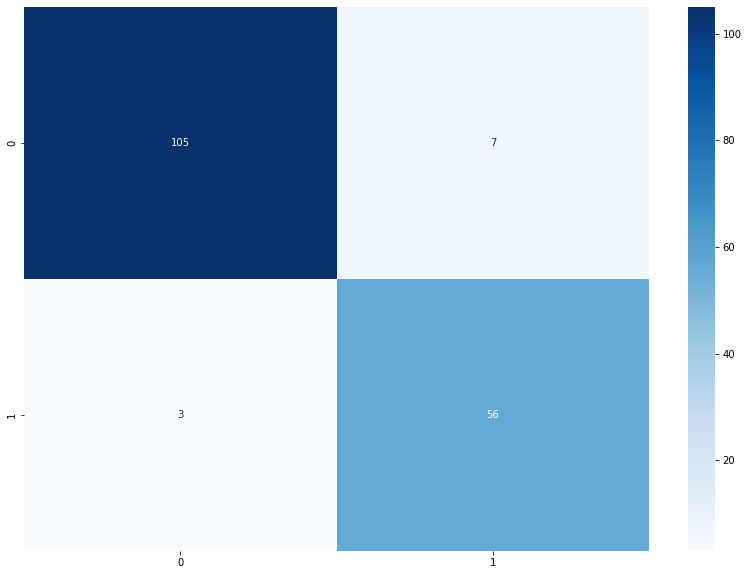

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(xgb_cm, annot=True,cmap='Blues', fmt='g')

# Hyperperameter Tuning using perameter 1

   

In [16]:
#let's randomly choose the parameters value and use GridSearchCV algorithm finding the best one. 

params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'max_depth':[4,5,6,8,10],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

print(params)

{'max_depth': [4, 5, 6, 8, 10], 'min_child_weight': range(1, 6, 2), 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]}


In [17]:
p_xgb_clf = XGBClassifier()
p_xgb_rcv = RandomizedSearchCV(p_xgb_clf, params, n_iter=200, cv=3)
p_xgb_rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=200,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [4, 5, 6, 8, 10],
                                        'min_child_weight': range(1, 6, 2),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]})

In [18]:
p_xgb_rcv.cv_results_

{'mean_fit_time': array([0.03515204, 0.0325036 , 0.03213072, 0.04828898, 0.10807554,
        0.09016458, 0.0365123 , 0.09182366, 0.03305387, 0.04854806,
        0.02941434, 0.05608376, 0.14760431, 0.07620796, 0.13836432,
        0.12516896, 0.06782738, 0.05890203, 0.12507963, 0.08134611,
        0.12201349, 0.14745943, 0.11031437, 0.04213166, 0.07885965,
        0.04928343, 0.15117868, 0.05845459, 0.03431161, 0.03934201,
        0.04246068, 0.08454506, 0.12061977, 0.10914667, 0.05837806,
        0.06899238, 0.05204431, 0.07612332, 0.05266825, 0.06682007,
        0.05935931, 0.03702784, 0.03172763, 0.0995055 , 0.07915958,
        0.05328202, 0.08806403, 0.06957936, 0.10537561, 0.06054425,
        0.04359468, 0.03132161, 0.04780785, 0.04332503, 0.0354894 ,
        0.04733102, 0.04881096, 0.04691879, 0.04537495, 0.03601964,
        0.03261852, 0.04008603, 0.04802608, 0.03884602, 0.03349137,
        0.03762992, 0.03317984, 0.0327758 , 0.03453   , 0.03593564,
        0.03754465, 0.03189739,

In [19]:
tuning_result = pd.DataFrame(p_xgb_rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_alpha,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035152,0.004702,0.003038,0.000152,0.7,1,3,10,0.4,0.7,"{'subsample': 0.7, 'reg_alpha': 1, 'min_child_...",0.939850,0.962406,0.962121,0.954792,0.010567,112
1,0.032504,0.001579,0.003025,0.000086,0.7,100,3,6,0.1,0.9,"{'subsample': 0.7, 'reg_alpha': 100, 'min_chil...",0.624060,0.624060,0.628788,0.625636,0.002229,162
2,0.032131,0.002105,0.003137,0.000128,0.7,0.01,5,10,0.1,0.6,"{'subsample': 0.7, 'reg_alpha': 0.01, 'min_chi...",0.939850,0.977444,0.954545,0.957280,0.015469,104
3,0.048289,0.016044,0.003518,0.000377,0.7,1,3,5,0.2,0.8,"{'subsample': 0.7, 'reg_alpha': 1, 'min_child_...",0.939850,0.969925,0.962121,0.957299,0.012743,80
4,0.108076,0.022007,0.003796,0.000237,0.6,100,1,4,0.3,0.6,"{'subsample': 0.6, 'reg_alpha': 100, 'min_chil...",0.624060,0.624060,0.628788,0.625636,0.002229,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.048316,0.002615,0.003617,0.000143,0.8,0.1,1,10,0.3,0.9,"{'subsample': 0.8, 'reg_alpha': 0.1, 'min_chil...",0.924812,0.962406,0.969697,0.952305,0.019667,139
196,0.040317,0.002476,0.003463,0.000192,0.7,0.01,5,4,0.0,0.6,"{'subsample': 0.7, 'reg_alpha': 0.01, 'min_chi...",0.939850,0.977444,0.954545,0.957280,0.015469,104
197,0.051475,0.007410,0.003818,0.000296,0.8,1,3,6,0.1,0.6,"{'subsample': 0.8, 'reg_alpha': 1, 'min_child_...",0.939850,0.969925,0.962121,0.957299,0.012743,80
198,0.032534,0.000626,0.003147,0.000007,0.9,100,3,8,0.1,0.6,"{'subsample': 0.9, 'reg_alpha': 100, 'min_chil...",0.624060,0.624060,0.628788,0.625636,0.002229,162


In [20]:
best_params = p_xgb_rcv.best_params_
best_params

{'subsample': 0.6,
 'reg_alpha': 0.01,
 'min_child_weight': 1,
 'max_depth': 10,
 'gamma': 0.0,
 'colsample_bytree': 0.8}

In [21]:
p_xgb_rcv.best_score_

0.9723741171109591

In [22]:
thebest_clf = p_xgb_rcv.best_estimator_

In [23]:
thebest_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
tu_ac = thebest_clf.score(X_test, y_test)
tu_ac

0.9415204678362573

In [25]:
print('Accuracy Score Before Tuning', xgb_acc)
print('Accuracy Score After Tuning', tu_ac)

Accuracy Score Before Tuning 0.9415204678362573
Accuracy Score After Tuning 0.9415204678362573


# Hyperperameter Tuning using perameter 2

In [27]:
param2 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

print(param2)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}


In [28]:
p_xgb_clf = XGBClassifier()
p2_xgb_rcv = RandomizedSearchCV(p_xgb_clf, param2, n_iter=200, cv=3)
p2_xgb_rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=200,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]})

In [29]:
p2_xgb_rcv.cv_results_

{'mean_fit_time': array([0.03773967, 0.03018554, 0.03453398, 0.03129061, 0.03067946,
        0.02741273, 0.02770861, 0.03069067, 0.02743093, 0.03580729,
        0.04369799, 0.03652374, 0.02704231, 0.02781574, 0.03074805,
        0.0272367 , 0.03196144, 0.02994641, 0.02734828, 0.0296677 ,
        0.04173923, 0.029133  , 0.02640827, 0.02792621, 0.03142126,
        0.03102001, 0.02732674, 0.03814665, 0.04322537, 0.0326457 ,
        0.02575429, 0.03181831, 0.03155796, 0.03496663, 0.02936117,
        0.03114597, 0.03365231, 0.03370229, 0.03263895, 0.034916  ,
        0.02923497, 0.03832825, 0.03429405, 0.03067406, 0.02678386,
        0.03287331, 0.03749164, 0.03077133, 0.02627309, 0.04186869,
        0.03571447, 0.03004511, 0.03266637, 0.03002898, 0.03049262,
        0.03229213, 0.0434409 , 0.03707457, 0.03708299, 0.0355107 ,
        0.03233933, 0.03099346, 0.0287923 , 0.03139981, 0.03415624,
        0.02878308, 0.02757208, 0.02964727, 0.03584774, 0.04260238,
        0.02868438, 0.0283064 ,

In [30]:
tuning_result = pd.DataFrame(p2_xgb_rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037740,0.007184,0.003028,0.000058,1,10,0.2,0.2,0.5,"{'min_child_weight': 1, 'max_depth': 10, 'lear...",0.939850,0.962406,0.962121,0.954792,0.010567,101
1,0.030186,0.000756,0.002908,0.000058,3,5,0.1,0.3,0.4,"{'min_child_weight': 3, 'max_depth': 5, 'learn...",0.947368,0.969925,0.969697,0.962330,0.010580,11
2,0.034534,0.001198,0.002977,0.000082,1,10,0.1,0.3,0.5,"{'min_child_weight': 1, 'max_depth': 10, 'lear...",0.939850,0.984962,0.969697,0.964836,0.018735,4
3,0.031291,0.001193,0.003033,0.000032,3,15,0.1,0.4,0.5,"{'min_child_weight': 3, 'max_depth': 15, 'lear...",0.939850,0.969925,0.962121,0.957299,0.012743,68
4,0.030679,0.000758,0.003012,0.000205,1,12,0.3,0.3,0.3,"{'min_child_weight': 1, 'max_depth': 12, 'lear...",0.939850,0.962406,0.969697,0.957318,0.012705,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.037370,0.000392,0.003316,0.000016,3,4,0.05,0.0,0.4,"{'min_child_weight': 3, 'max_depth': 4, 'learn...",0.932331,0.977444,0.962121,0.957299,0.018730,68
196,0.035248,0.000455,0.003220,0.000041,1,10,0.3,0.4,0.4,"{'min_child_weight': 1, 'max_depth': 10, 'lear...",0.939850,0.962406,0.962121,0.954792,0.010567,101
197,0.031438,0.000428,0.003208,0.000035,5,10,0.15,0.0,0.5,"{'min_child_weight': 5, 'max_depth': 10, 'lear...",0.939850,0.962406,0.962121,0.954792,0.010567,101
198,0.030637,0.000208,0.003168,0.000028,7,10,0.2,0.4,0.7,"{'min_child_weight': 7, 'max_depth': 10, 'lear...",0.924812,0.969925,0.954545,0.949761,0.018725,154


In [31]:
b_params = p2_xgb_rcv.best_params_
b_params

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [32]:
p2_xgb_rcv.best_score_

0.9648553201184781

In [33]:
best_clf = p2_xgb_rcv.best_estimator_

In [34]:
best_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [35]:
tu_acc = best_clf.score(X_test, y_test)

In [75]:
tu_y_pred = best_clf.predict(X_test)
tu_y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [37]:
tu_cm = confusion_matrix(tu_y_pred, y_test)
tu_cm

array([[106,   5],
       [  2,  58]])

<AxesSubplot:>

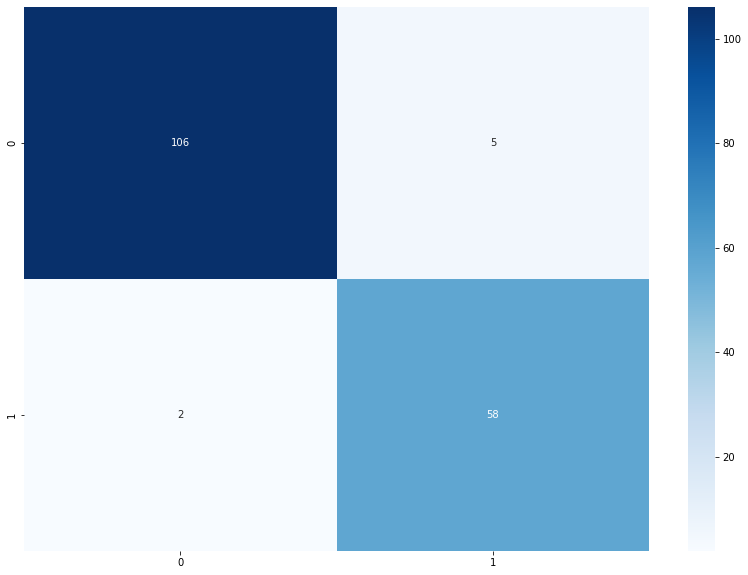

In [38]:
plt.figure(figsize=(14,10))
sns.heatmap(tu_cm, annot=True,cmap='Blues', fmt='g')

In [39]:
print('Accuracy Score Before Tuning', xgb_acc)
print('Accuracy Score After Tuning with Param1', tu_ac)
print('Accuracy Score After Tuning with Param2', tu_acc)

Accuracy Score Before Tuning 0.9415204678362573
Accuracy Score After Tuning with Param1 0.9415204678362573
Accuracy Score After Tuning with Param2 0.9590643274853801


# Hyperperameter Tuning using perameter 3

In [15]:
#Create random number list using Numpy
trees = np.random.randint(15,450,150)
trees

array([ 53,  92, 163,  83, 125, 321,  41,  30, 243, 121,  92, 204, 257,
        20, 261, 259, 281, 298, 440, 211,  53, 334, 126,  66,  72, 265,
       211, 227,  79,  37, 145, 441, 130, 142, 334, 364, 144, 420, 166,
       431,  40, 129, 390, 206, 445,  34, 161, 368, 217, 427, 369, 399,
        78, 218, 176,  50, 175, 199, 435,  49, 398,  79, 422,  95, 150,
        18,  63, 272, 247, 121, 347, 228, 369, 397,  19, 320, 410, 263,
       228, 162,  19, 285,  91, 406, 363,  83,  48, 405, 160, 162, 350,
       392, 125, 322, 231, 421, 313, 378, 424, 273,  85, 305, 259, 257,
       290, 101, 413, 445, 319, 439,  21, 287, 147,  71, 358,  95,  45,
       274, 408, 392,  35, 227, 290, 374, 448, 265, 226, 339,  39, 341,
       354, 283, 398, 112, 102, 176, 437,  16, 385, 187, 426, 360, 205,
       157, 349, 434, 110,  57, 380,  18])

In [48]:
alphas = np.random.random(10)
alphas

array([0.55471126, 0.50232666, 0.35058727, 0.89377454, 0.42473628,
       0.04654459, 0.18554081, 0.43597323, 0.28527811, 0.77818119])

In [66]:
colsamp = np.random.random(6)
colsamp

array([0.19542585, 0.50092253, 0.62855085, 0.81070328, 0.97449964,
       0.95019845])

In [67]:
param3 = {
    #'boster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50],
    'max_depth':trees,
    'min_child_weight' : [1,3,6],
    'max_delta_step' : [1,2,3,4,5,6,7,8],
    'gamma':[1,2,3,4,5],
    'subsample':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50],
    'colsample_bytree':colsamp,
    'reg_alpha': alphas
}

print(param3)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], 'max_depth': array([ 53,  92, 163,  83, 125, 321,  41,  30, 243, 121,  92, 204, 257,
        20, 261, 259, 281, 298, 440, 211,  53, 334, 126,  66,  72, 265,
       211, 227,  79,  37, 145, 441, 130, 142, 334, 364, 144, 420, 166,
       431,  40, 129, 390, 206, 445,  34, 161, 368, 217, 427, 369, 399,
        78, 218, 176,  50, 175, 199, 435,  49, 398,  79, 422,  95, 150,
        18,  63, 272, 247, 121, 347, 228, 369, 397,  19, 320, 410, 263,
       228, 162,  19, 285,  91, 406, 363,  83,  48, 405, 160, 162, 350,
       392, 125, 322, 231, 421, 313, 378, 424, 273,  85, 305, 259, 257,
       290, 101, 413, 445, 319, 439,  21, 287, 147,  71, 358,  95,  45,
       274, 408, 392,  35, 227, 290, 374, 448, 265, 226, 339,  39, 341,
       354, 283, 398, 112, 102, 176, 437,  16, 385, 187, 426, 360, 205,
       157, 349, 434, 110,  57, 380,  18]), 'min_child_weight': [1, 3, 6], 'max_delta_step': [1, 2, 3, 4, 5, 6, 7, 8], '

In [79]:
p3_xgb_clf = XGBClassifier()
p3_xgb_rcv = RandomizedSearchCV(p3_xgb_clf, param3, n_iter=200, cv=3)
p3_xgb_rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       290, 101, 413, 445, 319, 439,  21, 287, 147,  71, 358,  95,  45,
       274, 408, 392,  35, 227, 290, 374, 448, 265, 226, 339,  39, 341,
       354, 283, 398, 112, 102, 176, 437,  16, 385, 187, 426, 360, 205,
       157, 349, 434, 110,  57, 380,  18]),
                                        'min_child_weight': [1, 3, 6],
                                        'reg_alpha': array([0.55471126, 0.50232666, 0.35058727, 0.89377454, 0.42473628,
       0.04654459, 0.18554081, 0.43597323, 0.28527811, 0.77818119]),
                                        'subsample': [0.05, 0.1, 0.15, 0.2,
                                                      0.25, 0.3, 0.35, 0.4,
                                                      0.45, 0.5]})

In [80]:
p3_xgb_rcv.cv_results_

{'mean_fit_time': array([0.04908299, 0.03080503, 0.02500669, 0.02514323, 0.02653527,
        0.02758567, 0.02630623, 0.02731236, 0.0244147 , 0.02712377,
        0.06704164, 0.03893932, 0.03293077, 0.03493261, 0.03163632,
        0.03255614, 0.03120939, 0.03022305, 0.03412708, 0.03051591,
        0.02620697, 0.03112785, 0.03699557, 0.03613822, 0.02824569,
        0.03379202, 0.02671758, 0.03113699, 0.06208444, 0.04410474,
        0.02979517, 0.03263434, 0.03058751, 0.03260056, 0.03171929,
        0.03666886, 0.02997971, 0.02692238, 0.02572171, 0.03422308,
        0.02989332, 0.02810192, 0.03347898, 0.02687923, 0.02949961,
        0.02694615, 0.03051464, 0.03245926, 0.02603833, 0.02843372,
        0.02508839, 0.02882234, 0.02588073, 0.02754545, 0.02502418,
        0.02588232, 0.02586476, 0.02627659, 0.02573808, 0.02680977,
        0.0272944 , 0.02715937, 0.02910391, 0.02578203, 0.02767428,
        0.02709198, 0.02501464, 0.03187617, 0.02798343, 0.02630734,
        0.0273393 , 0.02585705,

In [81]:
p3_tuning_result = pd.DataFrame(p3_xgb_rcv.cv_results_)
p3_tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_alpha,param_min_child_weight,param_max_depth,param_max_delta_step,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049083,0.017296,0.002973,0.000043,0.5,0.185541,1,392,2,0.4,4,0.810703,"{'subsample': 0.5, 'reg_alpha': 0.185540808957...",0.939850,0.977444,0.939394,0.952229,0.017830,76
1,0.030805,0.001211,0.003152,0.000181,0.25,0.554711,1,19,7,0.25,5,0.500923,"{'subsample': 0.25, 'reg_alpha': 0.55471125816...",0.939850,0.962406,0.939394,0.947217,0.010742,98
2,0.025007,0.000163,0.002839,0.000043,0.15,0.554711,3,176,8,0.2,1,0.195426,"{'subsample': 0.15, 'reg_alpha': 0.55471125816...",0.924812,0.947368,0.946970,0.939717,0.010540,125
3,0.025143,0.000297,0.002929,0.000059,0.2,0.285278,3,160,2,0.4,4,0.195426,"{'subsample': 0.2, 'reg_alpha': 0.285278110864...",0.939850,0.969925,0.962121,0.957299,0.012743,46
4,0.026535,0.000297,0.002882,0.000055,0.5,0.502327,3,102,7,0.15,1,0.195426,"{'subsample': 0.5, 'reg_alpha': 0.502326663459...",0.939850,0.962406,0.977273,0.959843,0.015385,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.091776,0.007042,0.004210,0.000219,0.5,0.046545,1,290,3,0.05,3,0.9745,"{'subsample': 0.5, 'reg_alpha': 0.046544588352...",0.939850,0.977444,0.954545,0.957280,0.015469,51
196,0.055646,0.004702,0.003888,0.000283,0.2,0.424736,6,176,5,0.3,5,0.195426,"{'subsample': 0.2, 'reg_alpha': 0.424736282713...",0.902256,0.962406,0.939394,0.934685,0.024781,145
197,0.085843,0.009629,0.003665,0.000029,0.45,0.435973,3,440,8,0.05,5,0.950198,"{'subsample': 0.45, 'reg_alpha': 0.43597323264...",0.924812,0.969925,0.946970,0.947236,0.018418,94
198,0.071129,0.015493,0.003862,0.000140,0.25,0.424736,3,41,6,0.05,1,0.195426,"{'subsample': 0.25, 'reg_alpha': 0.42473628271...",0.932331,0.962406,0.962121,0.952286,0.014111,69


In [82]:
p3_tu_acc = best_clf.score(X_test, y_test)
p3_tu_acc

0.9590643274853801

In [83]:
p3_tu_y_pred = best_clf.predict(X_test)
p3_tu_y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [84]:
p3_tu_cm = confusion_matrix(p3_tu_y_pred, y_test)
p3_tu_cm

array([[106,   5],
       [  2,  58]])

<AxesSubplot:>

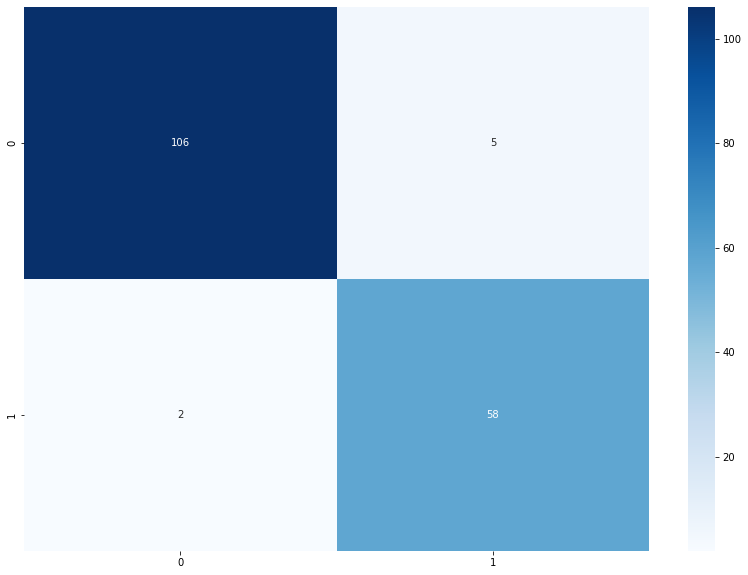

In [85]:
plt.figure(figsize=(14,10))
sns.heatmap(p3_tu_cm, annot=True,cmap='Blues', fmt='g')

In [86]:
print('Accuracy Score Before Tuning', xgb_acc)
print('Accuracy Score After Tuning with Parameter_1', tu_ac)
print('Accuracy Score After Tuning with Parameter_2', tu_acc)
print('Accuracy Score After Tuning with Parameter_3', p3_tu_acc)

Accuracy Score Before Tuning 0.9415204678362573
Accuracy Score After Tuning with Parameter_1 0.9415204678362573
Accuracy Score After Tuning with Parameter_2 0.9590643274853801
Accuracy Score After Tuning with Parameter_3 0.9590643274853801
